#EE769 Assignment 2(Part3)

##Vyomkesh Chaudhary
##203070028

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df_train_new = pd.read_csv('train_new.csv')                       ## Reading csv files which came after One Hot Encoding in Part1 of my ipynb files
df_test_new = pd.read_csv('test_new.csv')

In [ ]:
X_train, y_train = df_train_new[df_train_new.columns.drop("label")], df_train_new['label']

#Part 5: Second round of feature selection,importance of variables

## Feature importance with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',min_samples_split=8, n_estimators=1000,
                           random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
# helper function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
top_2_imp = base_imp[0:2]
top_2_features = top_2_imp.feature

In [ ]:
pylab.rcParams["figure.figsize"] = (10,10)

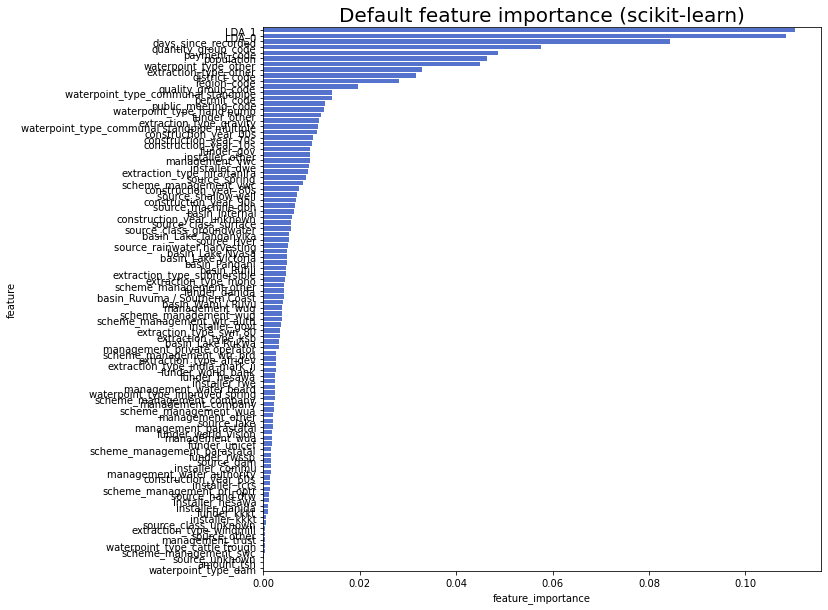

In [ ]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

#Observation:
Important features(priority wise)

1. LDA_1
2. LDA_2
3. days_since_recorded
4. quality_group_code
5. payment_code  (continued)


In [ ]:
X = df_train_new[top_2_features]
y = y_train

In [ ]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [ ]:
y_norm = y.to_numpy()

#Part 6:Visualization of decision boundaries

Taking LDA_1 and LDA_2 as my 2 important features.

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train1, X_test1, y_train1, y_test1 = tts(X_norm, y_norm, test_size=.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
build

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   32.8s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  a

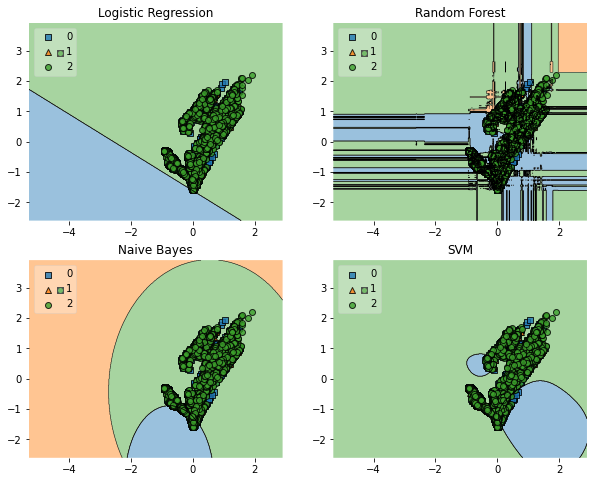

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(criterion='entropy', n_estimators = 1000,min_samples_split=8,random_state=42,verbose=5)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

labels = ['Logistic Regression','Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1 ,clf2 , clf3 ,clf4 ],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train1, y_train1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_test1,y_test1, clf=clf, legend=2)
    plt.title(lab)

plt.savefig("boundaries.png", dpi=300)
plt.show()

#Part 7: Submit the final labels

#Retraining the tuned model on the whole train set

In [4]:
df_train_final = pd.read_csv('train_final.csv')                       ## Reading csv files which contains features selected as in part2
df_test_final = pd.read_csv('test_final.csv')

In [5]:
X1 = df_train_final.drop("label",axis=1)
y1 = df_train_final["label"]

In [6]:
from sklearn.preprocessing import StandardScaler as ss              ##Normalizing
scalar = ss()
X_train_norm2 = scalar.fit_transform(X1)
X_test_norm2 = scalar.transform(df_test_final)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy', n_estimators = 1000,min_samples_split=8)
rfc.fit(X_train_norm2, y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
submission=rfc.predict(X_test_norm2)

In [12]:
df_submission = pd.DataFrame(submission, columns = ['status_group'])                          ##numpy to dataframe

In [13]:
df_submission.value_counts()                                                                ## no on counts in final file

status_group
2               9001
0               5347
1                502
dtype: int64

In [14]:
vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}                       ##replacing 0 , 1 ,2 with original strings

df_submission.status_group = df_submission.status_group.replace(vals_to_replace)

In [17]:
df_submission.to_csv("203070028_submission_result.csv", index=False)                                ##saving file without index

#Credits:

1. EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB
2. For decision boundary visualization: https://www.kaggle.com/pierpaolo28/machine-learning-visualization-5

3. https://scikit-learn.org/stable/